In [2]:
import scipy.io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#imports for LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_tweedie_deviance
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import tensorflow as tf
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RepeatVector, TimeDistributed
#import for zscore
from scipy import stats

In [3]:
sub1_train = scipy.io.loadmat('sub1_comp.mat')
sub1_test = scipy.io.loadmat('sub1_testlabels.mat')
sub2_train = scipy.io.loadmat('sub2_comp.mat')
sub2_test = scipy.io.loadmat('sub2_testlabels.mat')
sub3_train = scipy.io.loadmat('sub3_comp.mat')
sub3_test = scipy.io.loadmat('sub3_testlabels.mat')

In [4]:
sub1_x_train=pd.DataFrame(sub1_train['train_data'])
sub1_y_train=pd.DataFrame(sub1_train['train_dg'])
sub1_x_test=pd.DataFrame(sub1_train['test_data'])
sub1_y_test=pd.DataFrame(sub1_test['test_dg'])

sub2_x_train=pd.DataFrame(sub2_train['train_data'])
sub2_y_train=pd.DataFrame(sub2_train['train_dg'])
sub2_x_test=pd.DataFrame(sub2_train['test_data'])
sub2_y_test=pd.DataFrame(sub2_test['test_dg'])

sub3_x_train=pd.DataFrame(sub3_train['train_data'])
sub3_y_train=pd.DataFrame(sub3_train['train_dg'])
sub3_x_test=pd.DataFrame(sub3_train['test_data'])
sub3_y_test=pd.DataFrame(sub3_test['test_dg'])

In [5]:
sub1_x_train

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,193,-491,-4293,2659,918,3700,-1166,111,-376,245,...,-2587,1310,-4677,38,-4787,-2258,-1782,1827,3096,2395
1,96,-451,-4419,2682,614,3581,-864,284,-344,387,...,-2805,1295,-4681,-34,-4696,-2090,-1746,1794,3120,2497
2,329,-272,-4380,2862,513,3540,-523,501,-148,622,...,-2871,1357,-4537,40,-4357,-1791,-1578,1668,3236,2569
3,713,-3,-4141,3033,830,3436,-210,609,1,793,...,-2930,1424,-4354,171,-3888,-1473,-1415,1373,3344,2546
4,968,207,-3748,3120,1249,3235,-7,601,53,888,...,-3037,1377,-4171,307,-3445,-1220,-1345,975,3383,2425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,778,-452,1137,-353,-1442,2834,-1259,-2186,631,404,...,2536,1125,330,1070,1540,765,-436,3531,3068,670
399996,1111,-390,1325,-137,-861,2809,-863,-1822,713,534,...,2672,1326,365,1340,1741,1157,-186,3680,3161,1347
399997,1047,-588,1257,-238,-599,2679,-793,-1638,464,344,...,2517,1292,133,1308,1669,1255,-261,3559,2951,1856
399998,841,-834,962,-433,-681,2650,-924,-1555,134,-22,...,2273,1093,-172,1103,1488,1202,-458,3342,2703,2135


<Axes: >

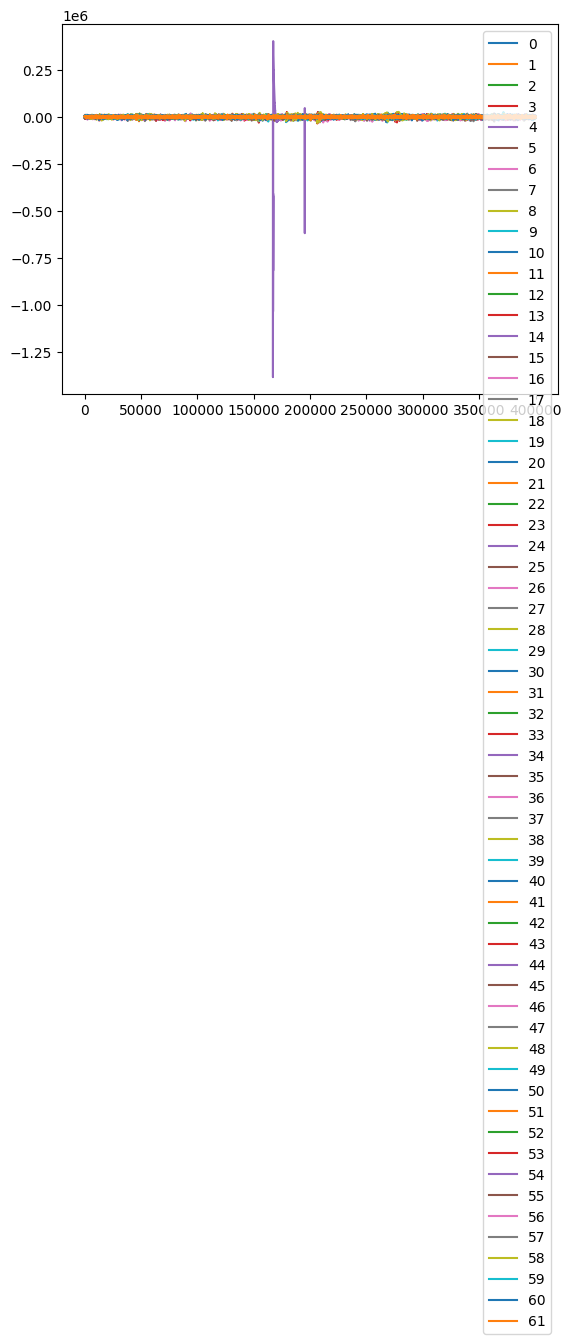

In [6]:
sub1_x_train.plot()

In [11]:
#apply zscore on x_train data and clip the outliers
#import zscore
from scipy import stats
from scipy.stats import zscore
sub1_x_train_final = sub1_x_train.apply(zscore)
sub1_x_train_final = sub1_x_train_final.clip(-3,3)

sub1_x_train_final.describe()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,...,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,0.000117,0.001140,0.000118,0.001762,0.000336,0.001130,0.005772,-0.000112,0.001166,0.003042,...,0.001016,0.000766,0.005925,0.005730,-0.000212,-0.000172,0.003175,0.001594,0.007238,0.004265
std,0.994035,0.977955,0.996173,0.941528,0.981478,0.991183,0.966417,0.995700,0.987329,0.986929,...,0.993949,0.981172,0.230791,0.976068,0.997146,0.996721,0.976799,0.989945,0.970333,0.979113
min,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.666447,-0.592851,-0.662067,-0.547905,-0.645074,-0.638590,-0.571246,-0.666886,-0.609795,-0.612456,...,-0.658973,-0.598981,-0.055928,-0.553228,-0.674539,-0.673429,-0.601377,-0.644288,-0.587292,-0.623169
50%,-0.007179,0.016121,0.004377,0.036202,-0.019478,0.009972,0.061497,0.000569,0.022230,0.030456,...,0.017640,0.021068,0.001986,0.068537,-0.015171,0.000417,0.017410,0.009571,0.044787,0.020772
75%,0.650234,0.623770,0.666607,0.579656,0.622505,0.660083,0.645790,0.671114,0.630223,0.660361,...,0.672576,0.631060,0.058140,0.646272,0.660915,0.667075,0.626212,0.658377,0.652113,0.655148
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


<Axes: >

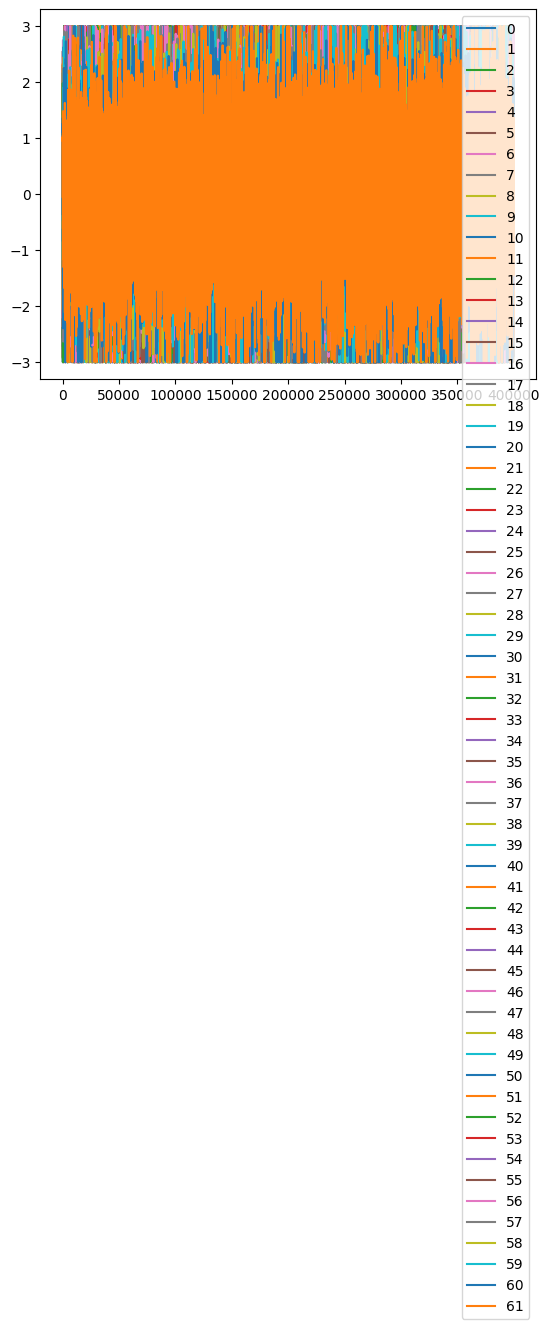

In [12]:
sub1_x_train_final.plot()

<Axes: >

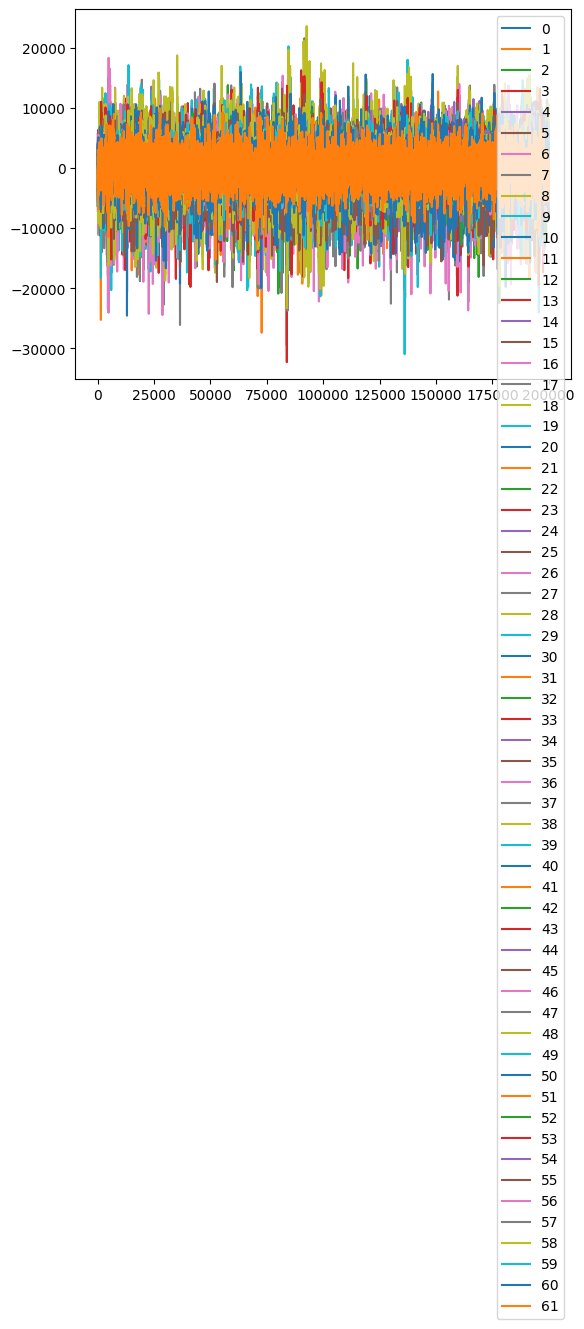

In [13]:
sub1_x_test.plot()

In [15]:
#apply zscore and clip it too on test data
sub1_x_test_final = sub1_x_test.apply(zscore)
sub1_x_test_final = sub1_x_test_final.clip(-3,3)

sub1_x_test_final.describe()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.000807,0.002454,0.000541,0.004354,0.001391,0.003647,0.006206,-0.000123,0.001218,0.003567,...,0.001118,0.001757,0.001209,0.003597,0.000512,-0.000034,0.003401,0.003166,0.005177,0.003542
std,0.995281,0.984783,0.993799,0.976121,0.984308,0.984035,0.973383,0.996477,0.987833,0.985220,...,0.992490,0.984084,0.992576,0.985673,0.996217,0.997212,0.984351,0.986807,0.978575,0.983533
min,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.653369,-0.590791,-0.654731,-0.577481,-0.625529,-0.617903,-0.579793,-0.669922,-0.604105,-0.608111,...,-0.634875,-0.599757,-0.643060,-0.568620,-0.661829,-0.666391,-0.620278,-0.621028,-0.567933,-0.616714
50%,0.002943,0.040753,0.000255,0.049400,0.001762,0.029931,0.070053,-0.000795,0.004400,0.037408,...,0.019230,0.012923,0.028233,0.075637,0.001373,-0.004408,0.021837,0.003561,0.067151,0.026971
75%,0.667379,0.629062,0.660710,0.636769,0.634286,0.656958,0.667158,0.666861,0.621861,0.653657,...,0.647525,0.626171,0.671280,0.662869,0.666982,0.664655,0.640267,0.649771,0.647610,0.646278
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


<Axes: >

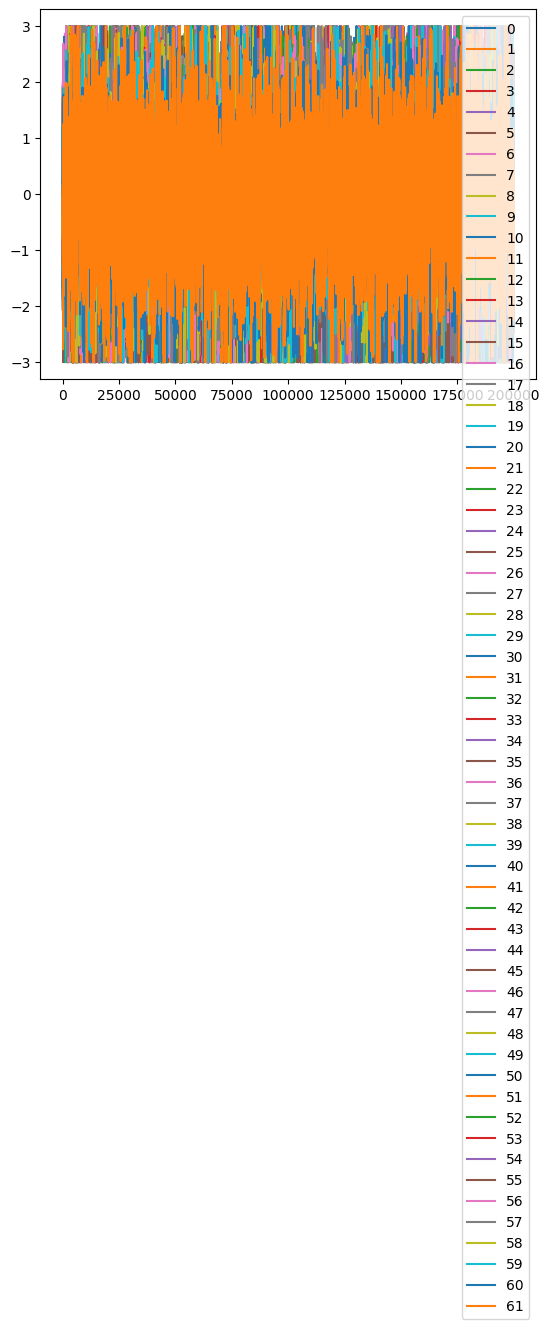

In [16]:
sub1_x_test_final.plot()

In [17]:
sub1_y_test

,0,1,2,3,4
0,-0.704228,-0.418322,-0.253147,-0.241320,-0.059460
1,-0.704316,-0.418322,-0.253147,-0.241299,-0.059460
2,-0.704403,-0.418322,-0.253147,-0.241279,-0.059460
3,-0.704489,-0.418322,-0.253147,-0.241258,-0.059460
4,-0.704575,-0.418322,-0.253147,-0.241237,-0.059460
...,...,...,...,...,...
199995,3.012252,-0.350811,-0.175468,-0.245033,-0.058219
199996,2.966711,-0.345495,-0.172822,-0.241422,-0.057356
199997,2.921104,-0.340174,-0.170173,-0.237805,-0.056493
199998,2.875451,-0.334850,-0.167523,-0.234182,-0.055628


In [18]:
#train a linear regression model on x_train_final and y_train and then find correlation with final y_test
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(sub1_x_train_final, sub1_y_train)
y_pred = regressor.predict(sub1_x_test_final)
y_pred_df=pd.DataFrame(y_pred)
y_pred_df 

,0,1,2,3,4
0,0.094115,-0.112285,-0.080032,-0.216450,-0.178620
1,0.087729,-0.119328,-0.105407,-0.251918,-0.155664
2,0.078331,-0.129819,-0.126267,-0.286274,-0.128348
3,0.076454,-0.139144,-0.134950,-0.304365,-0.102253
4,0.084497,-0.144884,-0.140873,-0.312777,-0.080998
...,...,...,...,...,...
199995,-0.211307,-0.228439,-0.326569,-0.162919,-0.103067
199996,-0.181426,-0.235048,-0.337593,-0.176164,-0.095981
199997,-0.160381,-0.237897,-0.340281,-0.167338,-0.100906
199998,-0.144893,-0.232459,-0.328093,-0.141205,-0.108349


In [26]:
#find correlation between y_pred and y_test
from scipy.stats import pearsonr
array1 = np.array(sub1_y_test)
array2 = np.array(y_pred_df)
corr, _ = pearsonr(array1.flatten(), array2.flatten())
print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: 0.024
